# 🛍️ Customer Segmentation Using RFM Analysis and Clustering

## 📌 Project Overview

This project aims to segment customers based on their purchasing behavior to enhance marketing strategies and personalization efforts. By analyzing transaction data from a UK-based online retailer, we utilize RFM (Recency, Frequency, Monetary) analysis combined with clustering techniques to identify distinct customer groups.

## 🎯 Business Understanding

In the competitive landscape of online retail, understanding customer behavior is crucial for targeted marketing and customer retention. The primary objectives of this project are:

- **Identify key customer segments** based on purchasing patterns.
- **Understand the characteristics and value** of each segment.
- **Provide actionable insights** for marketing and customer relationship management.

## 📁 Data Description

The analysis utilizes data from two sources:

1. **Online Retail Dataset**  
   Contains transactions from 01/12/2010 to 09/12/2011 for a UK-based online retailer.

2. **Online Retail II Dataset**  
   Extends the data range from 01/12/2009 to 09/12/2011, providing a more comprehensive view of customer transactions.

Both datasets include fields such as InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, and Country.


In [1]:
# Imports

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch
from sklearn.cluster import DBSCAN
from tabulate import tabulate

%matplotlib inline

In [2]:
# Creating dataframe from first dataset

df1 = pd.read_excel("online_retail.xlsx", parse_dates=['InvoiceDate'])
df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
df1.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
# Creating dataframe from second dataset

df2 = pd.read_excel("online_retail_II.xlsx", parse_dates=['InvoiceDate'])
df2.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [6]:
df2.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525460,538171,21931,JUMBO STORAGE BAG SUKI,2,2010-12-09 20:01:00,1.95,17530.0,United Kingdom


In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


#### Both dataframes share the same features, datatypes of features are similar as well however there are 3 feature names that are not uniform in both dataframes df1 and df2 respectively:
- **`InvoiceNo`** as **`Invoice`** 
- **`UnitPrice`** as **`Price`** 
- **`CustomerID`** as **`Customer ID`**

### Renaming features/column names

In [8]:
# Renaming column names in df2 to match column names in df1

df2.rename(columns={
    "Invoice":"InvoiceNo",
    "Price":"UnitPrice",
    "Customer ID":"CustomerID"
}, inplace=True)

In [9]:
# Checking to see if column names have changed

df2.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [10]:
# Concantenate the two dataframes into one dataframe

df = pd.concat([df1,df2], ignore_index=True)
df.shape

(1067370, 8)

In [11]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [12]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1067365,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
1067366,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
1067367,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
1067368,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
1067369,538171,21931,JUMBO STORAGE BAG SUKI,2,2010-12-09 20:01:00,1.95,17530.0,United Kingdom


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067370 entries, 0 to 1067369
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   InvoiceNo    1067370 non-null  object        
 1   StockCode    1067370 non-null  object        
 2   Description  1062988 non-null  object        
 3   Quantity     1067370 non-null  int64         
 4   InvoiceDate  1067370 non-null  datetime64[ns]
 5   UnitPrice    1067370 non-null  float64       
 6   CustomerID   824363 non-null   float64       
 7   Country      1067370 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB


## **Data Cleaning**

In [14]:
# Checking for missing values

df.isna().sum()

InvoiceNo           0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     243007
Country             0
dtype: int64

In [15]:
# Checking out rows with missing CustomerID

null_df = df[df["CustomerID"].isna() == True]
null_df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
1447,536544,21790,VINTAGE SNAP CARDS,9,2010-12-01 14:32:00,1.66,NaN,United Kingdom
1448,536544,21791,VINTAGE HEADS AND TAILS CARD GAME,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1449,536544,21801,CHRISTMAS TREE DECORATION WITH BELL,10,2010-12-01 14:32:00,0.43,NaN,United Kingdom
1450,536544,21802,CHRISTMAS TREE HEART DECORATION,9,2010-12-01 14:32:00,0.43,NaN,United Kingdom
1451,536544,21803,CHRISTMAS TREE STAR DECORATION,11,2010-12-01 14:32:00,0.43,NaN,United Kingdom


In [16]:
# Checking out the timeline of the dataset

unique_years = df['InvoiceDate'].dt.year.unique()
print(sorted(unique_years))

[2009, 2010, 2011]


In [17]:
# Checking out how many Duplicates are in the dataset

len(df[df.duplicated(keep="first")])

34335

### Data Cleaning Steps:

#### Handle Missing Values:
- CustomerID has missing values, which are essential for customer-based segmentation i.e., we can't segment anonymous customers. I'll drop rows where CustomerID is missing.
- Description also has missing values but its not critical for segmentation and can be ignored for now.

#### Remove transactions with Negative or Zero quantity/price:
- Negative quantities likely indicate returns. We'll remove them for now.

#### Create New Features:
- Total revenue per row: TotalPrice = Quantity * UnitPrice

#### Change Datatype:
- I'll covert Customer ID from float to string for grouping purposes

#### Deal with Duplicated Rows
- I'll also drop all duplicate rows

In [18]:
# Creating a data wrangling function

def wrangle(df):
    # 1. Sort by InvoiceDate
    df = df.sort_values("InvoiceDate").reset_index(drop=True)

    # 2. Drop rows with null values in CustomerID
    df.dropna(subset=["CustomerID"], inplace=True)

    # 3. Remove negative quantities
    df = df[(df["Quantity"] > 0) & (df["UnitPrice"] > 0)]

    # 4. Convert CustomerID to string for grouping purposes
    df["CustomerID"] = df["CustomerID"].astype(str)

    # 5. Create a new feature for total revenue per row
    df["TotalPrice"] = df["UnitPrice"] * df["Quantity"]

    # 6. Remove duplicate rows
    df = df.drop_duplicates()

    return df


In [19]:
df = wrangle(df)
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
TotalPrice     0
dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 779424 entries, 0 to 1067369
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    779424 non-null  object        
 1   StockCode    779424 non-null  object        
 2   Description  779424 non-null  object        
 3   Quantity     779424 non-null  int64         
 4   InvoiceDate  779424 non-null  datetime64[ns]
 5   UnitPrice    779424 non-null  float64       
 6   CustomerID   779424 non-null  object        
 7   Country      779424 non-null  object        
 8   TotalPrice   779424 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 59.5+ MB


In [21]:
# Checking out first five rows/observations
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [22]:
# Checking out unique countries and count of purchases per country

df["Country"].value_counts()

Country
United Kingdom          700388
Germany                  16432
EIRE                     15565
France                   13510
Netherlands               5085
Spain                     3662
Belgium                   3055
Switzerland               3005
Portugal                  2356
Australia                 1789
Channel Islands           1551
Italy                     1442
Sweden                    1317
Norway                    1289
Cyprus                    1136
Finland                   1032
Austria                    922
Denmark                    778
Greece                     657
Unspecified                518
Poland                     504
Japan                      468
USA                        409
United Arab Emirates       383
Singapore                  339
Israel                     319
Malta                      282
Canada                     228
Iceland                    222
Lithuania                  154
RSA                        122
Brazil                      94


## **Exploratory Data Analysis (EDA)**

#### 1. Transactions over Time

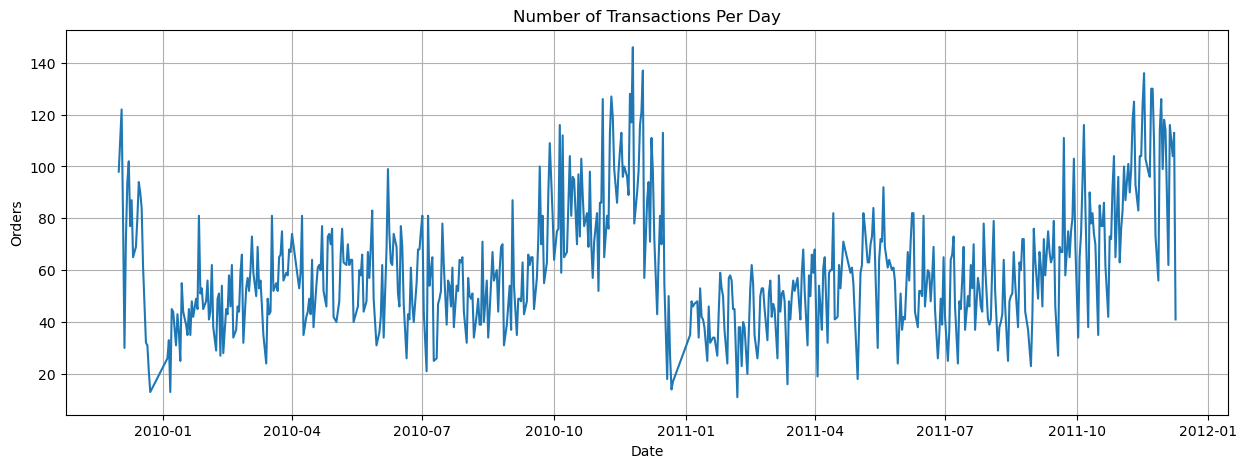

In [23]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceDay'] = df['InvoiceDate'].dt.date

daily_orders = df.groupby('InvoiceDay')['InvoiceNo'].nunique()

plt.figure(figsize=(15,5))
daily_orders.plot()
plt.title('Number of Transactions Per Day')
plt.ylabel('Orders')
plt.xlabel('Date')
plt.grid(True)
plt.show()


#### **Transaction Patterns**

#### Seasonal Trends: 
- The transaction volume shows clear seasonality with peaks around Q4 (October-December) in both 2010 and 2011, suggesting holiday shopping patterns.
#### Growth Trajectory: 
- Transaction volume shows strong growth toward the end of 2011, potentially indicating business expansion or increased market share.
#### Volatility: 
- Daily transaction counts fluctuate significantly (ranging from ~15 to ~145 orders per day), highlighting the need for flexible operational capacity.

#### 2. Top Countries by Transaction

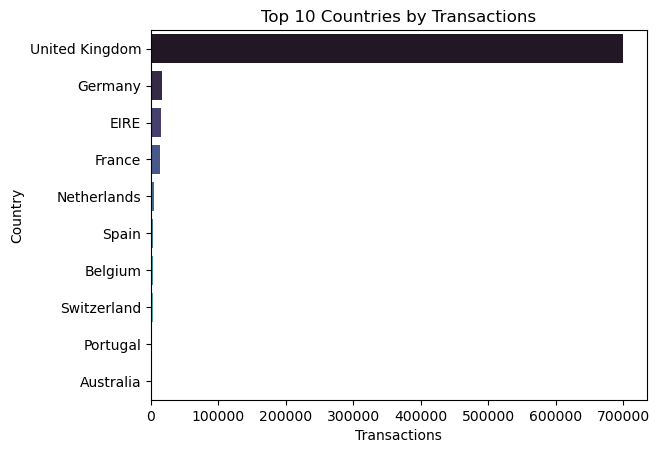

In [24]:
top_countries = df['Country'].value_counts().head(10)
sns.barplot(y=top_countries.index, x=top_countries.values, palette='mako')
plt.title('Top 10 Countries by Transactions')
plt.xlabel('Transactions')
plt.ylabel('Country')
plt.show()


#### **Geographic Distribution**

#### Market Concentration: 
- The UK dominates transactions by an overwhelming margin, representing approximately 7x more transactions than the next largest market (Germany).
#### European Focus: 
- 9 of the top 10 countries are European, with Australia being the only non-European market in the top 10.
#### Expansion Opportunity: 
- The significant drop-off after the UK suggests potential for targeted growth in secondary markets.

#### 3. Top Products Sold by Quantity

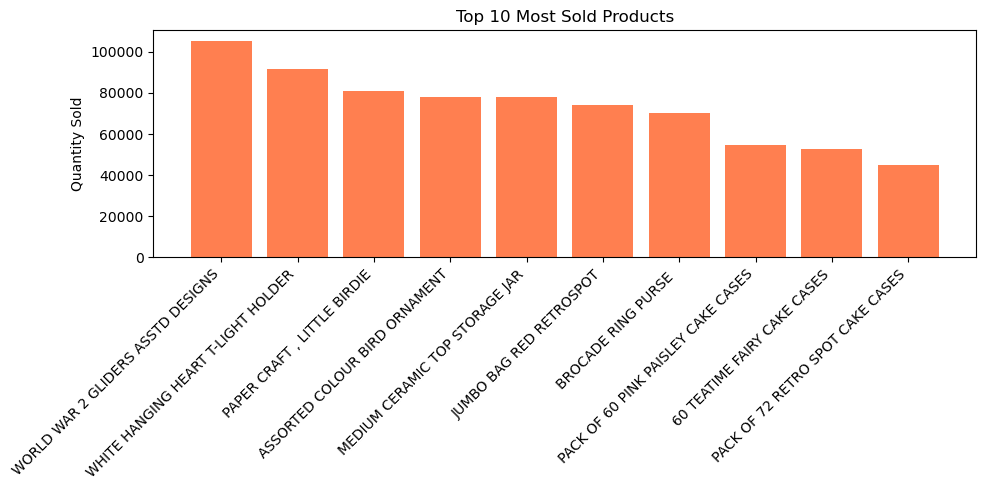

In [25]:
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
bars = plt.bar(top_products.index, top_products.values, color='coral')
plt.title("Top 10 Most Sold Products")
plt.ylabel("Quantity Sold")
plt.xticks(ticks=range(len(top_products.index)), labels=top_products.index, rotation=45, ha='right')
plt.tight_layout()
plt.show()


#### **Product Performance**

#### Product Portfolio: 
- The top-selling product ("WORLD WAR 2 GLIDERS ASSTD DESIGNS") significantly outperforms others, with approximately 100,000 units sold.
#### Category Insights: 
- Decorative items and gift products dominate the top-selling list, with a gradual decrease in sales volume across the top 10.
#### Revenue Drivers: 
- Based on product names, the business appears to focus on vintage-inspired home décor and gift items.

#### 4. Top Revenue Generating Customers

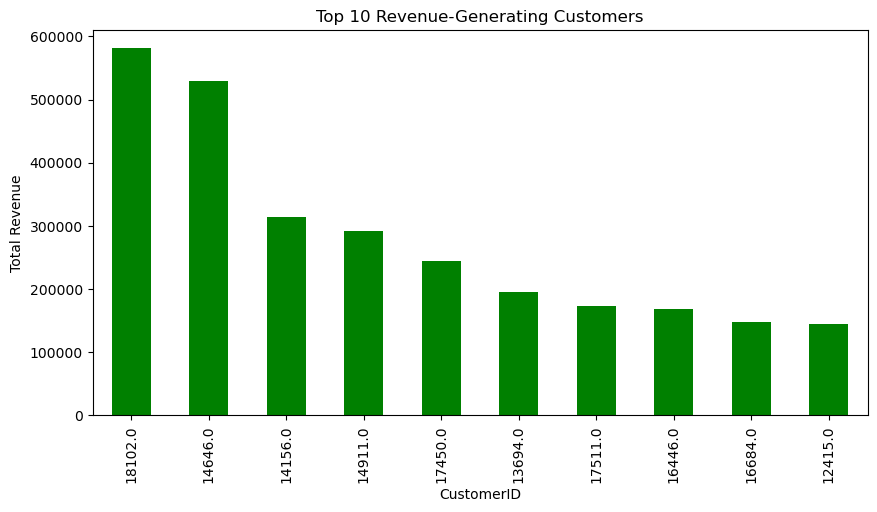

In [26]:
# Top revenue-generating customers
top_customers = df.groupby('CustomerID')['TotalPrice'].sum().sort_values(ascending=False).head(10)
top_customers.plot(kind='bar', figsize=(10,5), color='green')
plt.title("Top 10 Revenue-Generating Customers")
plt.ylabel("Total Revenue")
plt.show()


#### **Customer Value Analysis**

#### Revenue Concentration: 
- Customer revenue follows a Pareto-like distribution with the top two customers generating significantly more revenue than others.
#### Customer 18102: 
- The highest-value customer generates nearly 600,000 in revenue, almost 4x more than the 10th highest customer.
#### Value Gap: 
- There's a substantial drop in revenue contribution between the top 2 and the remaining customers, highlighting key account dependencies.

## **Feature Engineering**

In [27]:
# Define Reference date

# reference date: 1 day after latest transaction to find how many days the last purchase was
reference_date = df["InvoiceDate"].max() + dt.timedelta(days=1)

### Group Transactions By Customer and create rfm table

In [28]:
rfm = df.groupby("CustomerID").agg({
    'InvoiceNo':'nunique', # Frequency: number of transactions
    'TotalPrice':'sum',    # Monetary: total money spent
    'InvoiceDate':lambda x: (reference_date - x.max()).days    # Recency: Last Purchase Date
}).reset_index()

rfm.rename(columns={
    'InvoiceNo':'Frequency',
    'TotalPrice':'Monetary',
    'InvoiceDate':'Recency'
}, inplace=True)

rfm.head()

,CustomerID,Frequency,Monetary,Recency
0,12346.0,12,77556.46,326
1,12347.0,8,4921.53,2
2,12348.0,5,2019.40,75
3,12349.0,4,4428.69,19
4,12350.0,1,334.40,310


#### I'm summarizing each customer’s behavior into 3 key metrics:

- Recency: Days since last purchase (lower = better)

- Frequency: How often they buy (higher = better)

- Monetary: Total value of purchases (higher = better)

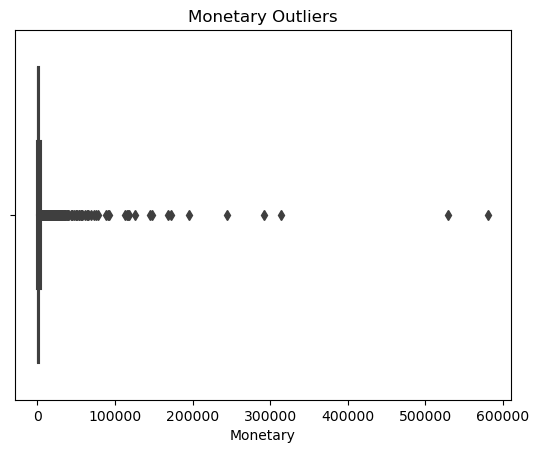

In [29]:
# Checking for monetary outliers

sns.boxplot(x=rfm['Monetary'])
plt.title('Monetary Outliers')
plt.show()


In [30]:
rfm.sort_values('Monetary', ascending=False).head(30)


,CustomerID,Frequency,Monetary,Recency
5692,18102.0,145,580987.04,1
2277,14646.0,151,528602.52,2
1789,14156.0,156,313437.62,10
2538,14911.0,398,291420.81,1
5050,17450.0,51,244784.25,8
1331,13694.0,143,195640.69,4
5109,17511.0,60,172132.87,3
4061,16446.0,2,168472.50,1
4295,16684.0,55,147142.77,4
68,12415.0,28,144458.37,24


#### I will be keeping the outliers

### RFM Scoring and Segmentation

#### 1. Score each RFM Metric

In [31]:
# Convert raw numbers into scaled scores (1–5), where 5 is best.
# Assign scores using quintiles

# R: Lower is better => reverse labels
rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1])

# F and M: Higher is better
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 5, labels=[1, 2, 3, 4, 5])



#### 2. Combine RFM Scores

In [32]:
# Combine Scores into one feature by concantenating RFM into a single string

rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)

rfm[['CustomerID', 'RFM_Score']].head()

,CustomerID,RFM_Score
0,12346.0,255
1,12347.0,545
2,12348.0,344
3,12349.0,535
4,12350.0,212


#### 3. Create Customer Segments

In [33]:
def segment_customer(row):
    r = int(row['R_Score'])
    f = int(row['F_Score'])
    m = int(row['M_Score'])

    if r >= 4 and f >= 4 and m >= 4:
        return 'Champions'
    elif r >= 3 and f >= 3 and m >= 3:
        return 'Loyal Customers'
    elif r >= 3 and f >= 1 and m >= 2:
        return 'Potential Loyalists'
    elif r >= 4 and f <= 2 and m <= 2:
        return 'New Customers'
    elif r <= 2 and f >= 3 and m >= 3:
        return 'At Risk'
    elif r <= 2 and f >= 2 and m >= 2:
        return 'Need Attention'
    elif r <= 1 and f <= 2 and m <= 2:
        return 'Lost'
    else:
        return 'Others'

rfm['Segment'] = rfm.apply(segment_customer, axis=1)


#### 4. Final RFM Table

In [34]:
rfm[['CustomerID', 'Recency', 'Frequency', 'Monetary', 'RFM_Score', 'Segment']].head()

,CustomerID,Recency,Frequency,Monetary,RFM_Score,Segment
0,12346.0,326,12,77556.46,255,At Risk
1,12347.0,2,8,4921.53,545,Champions
2,12348.0,75,5,2019.40,344,Loyal Customers
3,12349.0,19,4,4428.69,535,Loyal Customers
4,12350.0,310,1,334.40,212,Others


#### 5. Visualizing

In [35]:
# Segment distribution
segment_counts = rfm['Segment'].value_counts().sort_values(ascending=False)
segment_counts.columns = ['Segment', 'Count']

# Segment characteristics
segment_stats = rfm.groupby('Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
}).reset_index()

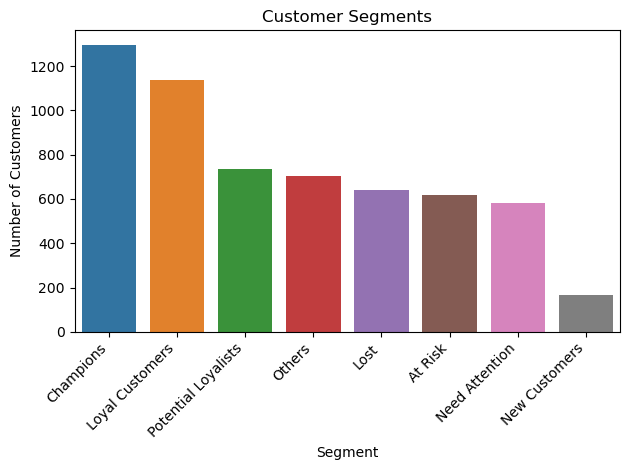

In [36]:
# Number of customers per segment
sns.barplot(x=segment_counts.index, y=segment_counts.values)
plt.xticks(ticks=range(len(segment_counts.index)), labels=segment_counts.index, rotation=45, ha='right')
plt.title("Customer Segments")
plt.ylabel("Number of Customers")
plt.xlabel("Segment")
plt.tight_layout()
plt.show();

In [37]:
# Calculate average order value
rfm['AOV'] = rfm['Monetary'] / rfm['Frequency']

# Calculate lifetime value and other metrics
segment_extended_stats = rfm.groupby('Segment').agg({
    'CustomerID': 'count',
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'AOV': 'mean',
}).rename(columns={'CustomerID': 'Customer_Count'})

# Calculate percentage of total revenue by segment
segment_extended_stats['Revenue_Percent'] = segment_extended_stats['Monetary'] * segment_extended_stats['Customer_Count'] / (segment_extended_stats['Monetary'] * segment_extended_stats['Customer_Count']).sum() * 100

In [38]:
segment_extended_stats

,Customer_Count,Recency,Frequency,Monetary,AOV,Revenue_Percent
Segment,,,,,,
At Risk,616,359.508117,5.620130,2444.231903,430.618690,8.665700
Champions,1297,19.961449,17.105628,9143.863913,447.643602,68.257481
Lost,641,568.252730,1.070203,207.379268,200.335906,0.765075
Loyal Customers,1138,73.381371,5.949912,2255.382870,391.074791,14.772128
Need Attention,583,411.905660,2.102916,679.770086,375.347062,2.280926
New Customers,166,29.162651,1.174699,172.617771,153.246476,0.164920
Others,703,280.749644,1.318634,344.352164,320.826535,1.393281
Potential Loyalists,734,62.636240,2.065395,875.956435,510.855427,3.700489


#### RFM Segment Summary

The RFM segmentation identified eight distinct customer segments based on their recency, frequency, and monetary behavior:

- **Champions** (1,297 customers) are the most engaged and highest-spending group, contributing **68.26%** of total revenue with frequent and recent purchases.
- **Loyal Customers** (1,138) consistently buy and make up **14.77%** of revenue, indicating a strong customer base.
- **At Risk** (616) have not purchased recently but still show high monetary and frequency values, contributing **8.67%** of revenue — they need re-engagement.
- **Potential Loyalists** (734) show promise with moderate recency and spending, holding **3.70%** of revenue share — they can be nurtured into loyal customers.
- **Need Attention** (583) are becoming inactive; they have lower frequency and spending, generating **2.28%** of revenue.
- **Others** (703) and **Lost** (641) are largely disengaged with low frequency and monetary values, together contributing only about **2.16%**.
- **New Customers** (166) are recent first-time buyers — they make up just **0.16%** of revenue but represent growth potential.

**Insight**: The top 3 segments (Champions, Loyal Customers, At Risk) contribute **over 91%** of the total revenue, indicating where the business should focus retention and engagement strategies.


## Data Preprocessing

In [39]:
# Select only RFM Columns
rfm_ml_clustering = rfm[["Frequency", "Monetary", "Recency"]].copy()

# Log-transform the Monetary column to reduce right-skew (handle outliers)
rfm_ml_clustering['Monetary'] = np.log1p(rfm_ml_clustering['Monetary'])

# Normalizing the data
scaler = StandardScaler()

rfm_scaled = scaler.fit_transform(rfm_ml_clustering)

## MODELLING

### K-Means Clustering

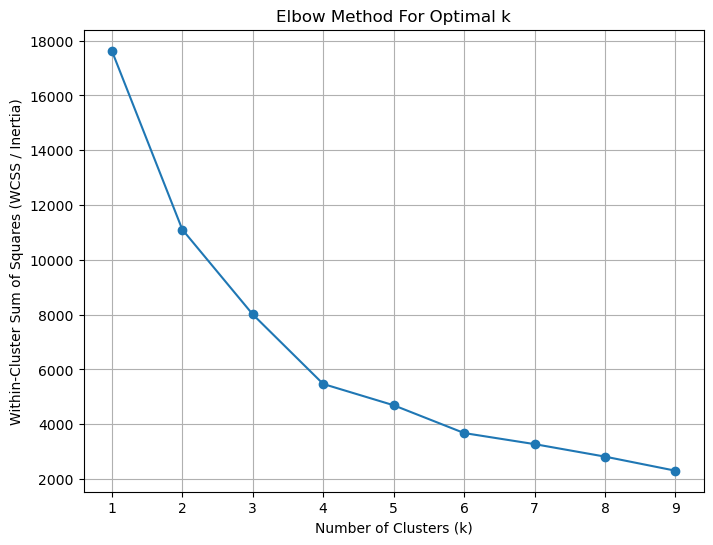

In [40]:
# Choose number of clusters using elbow method

# Elbow method to determine optimal k
elbow = []
K = range(1, 10)
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(rfm_scaled)
    elbow.append(km.inertia_)

# Plot with labels
plt.figure(figsize=(8, 6))
plt.plot(K, elbow, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS / Inertia)')
plt.xticks(K)
plt.grid(True)
plt.show();

#### Silhouette Score

Silhouette Score for k = 2: 0.4273
Silhouette Score for k = 3: 0.4433
Silhouette Score for k = 4: 0.4100
Silhouette Score for k = 5: 0.3811
Silhouette Score for k = 6: 0.3841
Silhouette Score for k = 7: 0.3831
Silhouette Score for k = 8: 0.3623
Silhouette Score for k = 9: 0.3631


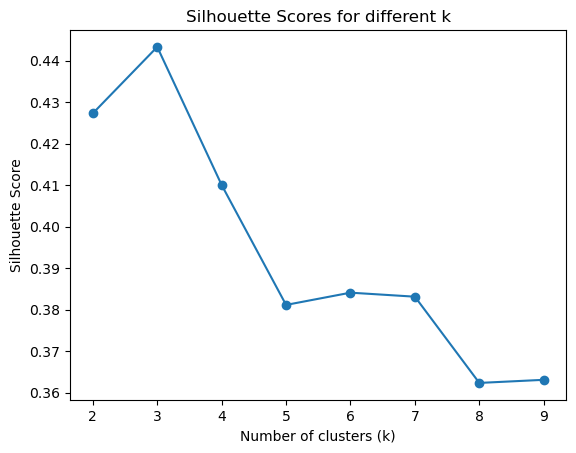

In [41]:
silhouette_scores = []

# Try different values of k
K = range(2, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(rfm_scaled)
    score = silhouette_score(rfm_scaled, labels)
    silhouette_scores.append(score)
    print(f"Silhouette Score for k = {k}: {score:.4f}")

# Plotting the scores
plt.plot(K, silhouette_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for different k')
plt.show();

In [42]:
# Find best k from our silhoutte score

optimal_k = K[silhouette_scores.index(max(silhouette_scores))]
print(f"Optimal number of clusters: {optimal_k}")

Optimal number of clusters: 3


#### Final Model

In [43]:
# Create Model
kmeans_model = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')

# Fit Model
kmeans_model.fit(rfm_scaled)


KMeans(n_clusters=3, random_state=42)

## **Results**

### **KMeans Cluster Analysis**

In [44]:
# Assigning the cluster labels back to my RFM DataFrame
rfm['Cluster'] = kmeans_model.labels_

# View summary statistics per cluster
cluster_summary = rfm.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean().round(2)
print("Cluster Summary:")
cluster_summary

Cluster Summary:


,Recency,Frequency,Monetary
Cluster,,,
0,418.67,1.90,534.81
1,63.79,8.11,3636.17
2,21.42,152.12,131785.80


In [45]:
# View number of customers in each cluster

cluster_counts = rfm['Cluster'].value_counts().sort_index()
print("\nCustomers per Cluster:")
cluster_counts


Customers per Cluster:


Cluster
0    2281
1    3573
2      24
Name: count, dtype: int64

### **Cluster Overview**

In [46]:
# Group and summarize
cluster_summary = rfm.groupby('Cluster').agg(
    Recency=('Recency', 'mean'),
    Frequency=('Frequency', 'mean'),
    Monetary=('Monetary', 'mean'),
    Customers=('CustomerID', 'count')
).round(2)

# Format 'Customers' and 'Monetary' columns with commas
cluster_summary['Customers'] = cluster_summary['Customers'].apply(lambda x: f"{x:,}")
cluster_summary['Monetary'] = cluster_summary['Monetary'].apply(lambda x: f"{x:,.2f}")

# Display
print(cluster_summary.reset_index().to_markdown(index=False))

|   Cluster |   Recency |   Frequency | Monetary   | Customers   |
|----------:|----------:|------------:|:-----------|:------------|
|         0 |    418.67 |        1.9  | 534.81     | 2,281       |
|         1 |     63.79 |        8.11 | 3,636.17   | 3,573       |
|         2 |     21.42 |      152.12 | 131,785.80 | 24          |


#### Cluster Visualization

#### 1. Recency vs Frequency

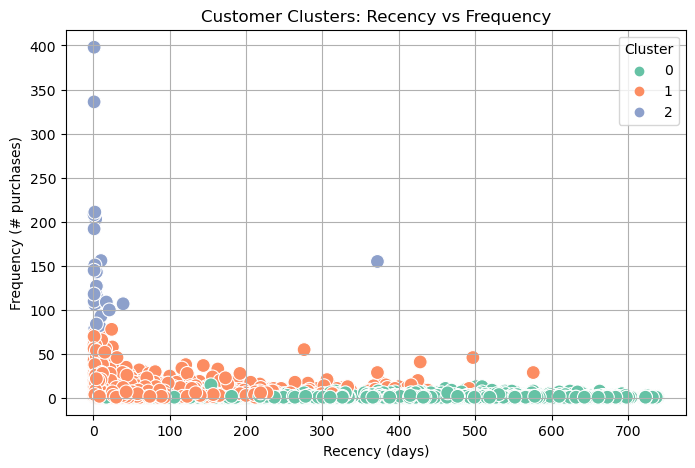

In [47]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=rfm, x='Recency', y='Frequency', hue='Cluster', palette='Set2', s=100)
plt.title('Customer Clusters: Recency vs Frequency')
plt.xlabel('Recency (days)')
plt.ylabel('Frequency (# purchases)')
plt.grid(True)
plt.show();

#### 2. Recency vs Monetary

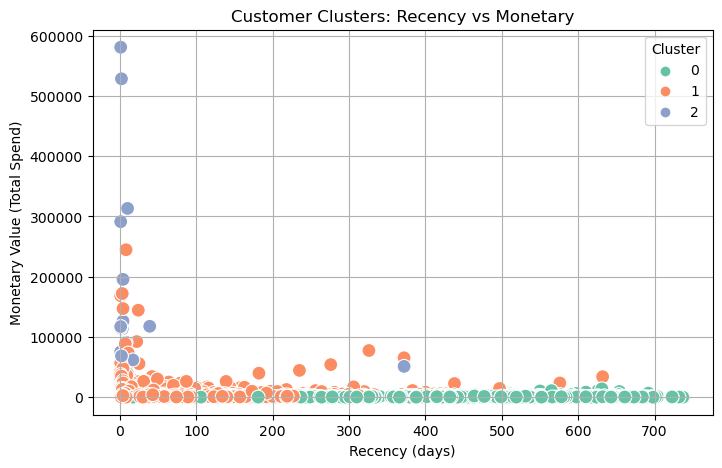

In [48]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=rfm, x='Recency', y='Monetary', hue='Cluster', palette='Set2', s=100)
plt.title('Customer Clusters: Recency vs Monetary')
plt.xlabel('Recency (days)')
plt.ylabel('Monetary Value (Total Spend)')
plt.grid(True)
plt.show();

#### 3. Frequency vs Monetary

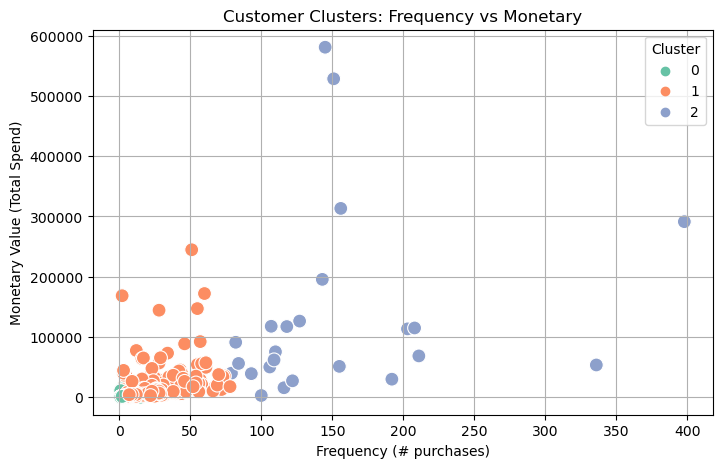

In [49]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=rfm, x='Frequency', y='Monetary', hue='Cluster', palette='Set2', s=100)
plt.title('Customer Clusters: Frequency vs Monetary')
plt.xlabel('Frequency (# purchases)')
plt.ylabel('Monetary Value (Total Spend)')
plt.grid(True)
plt.show();

In [50]:
# Including segmentation column for deeper analysis

print("Sample of final RFM with segmentation and cluster:")
rfm[['CustomerID', 'Segment', 'Cluster']].sample(10)

Sample of final RFM with segmentation and cluster:


,CustomerID,Segment,Cluster
4019,16404.0,Potential Loyalists,1
1072,13431.0,Loyal Customers,1
916,13269.0,Champions,1
1965,14333.0,Potential Loyalists,1
3976,16361.0,Loyal Customers,1
4874,17271.0,Lost,0
2404,14774.0,Lost,0
5382,17790.0,Champions,1
4750,17147.0,Champions,1
366,12714.0,Champions,1


### **Interpretation of Clusters**

### **Cluster 0 – Sleeping / At Risk:**

- **High recency (418.67)** → Long time since last purchase  
- **Low frequency (1.9)** and monetary value → Not engaged  
- Dominated by **Lost, At Risk, and Need Attention** segments
- Second highest number of customers (2,281 customers)

**Strategy**:
- Win-back campaigns ("We miss you", “20% off if you come back”)  
- Reactivation incentives  
- **Re-engagement** campaigns or consider churn strategies
- Remove from active marketing if no response  



### **Cluster 1 – Engaged & Growing:**

- Medium recency (63.79), good frequency (8.11), and decent monetary value  
- High mix of Champions, Loyal Customers, and Potential Loyalists  
- Highest number of customers (3,573 customers)

**Strategy**:
- Retention via engaging them through email/SMS to keep them coming  
- Promote bundle offers / loyalty cards  
- Upsell opportunities  
- Cross-sell

### **Cluster 2 – VIP / Top Champions:**

- Lowest recency (21 days) 
- Extremely **frequent** (152 times!)  
- Highest **spend** by far (131k+ average) 
- Almost entirely Champions
- Lowest number of customers (24 customers)

**Strategy**:
- Personal account manager  
- Invite to loyalty/VIP programs  
- Early access to offers, appreciation tokens  
- Priority customer service  

### **Deeper Analysis into RFM segment distribution per Cluster** 

In [51]:
# Crosstab: Count of each segment per cluster
cluster_segment_crosstab = pd.crosstab(rfm['Cluster'], rfm['Segment'])

# Normalize to get percentages
cluster_segment_pct = pd.crosstab(rfm['Cluster'], rfm['Segment'], normalize='index') * 100

print("Raw Crosstab:")
print(tabulate(cluster_segment_crosstab, headers='keys', tablefmt='github'))

print("\nPercentage Crosstab:")
print(tabulate(cluster_segment_pct.round(2), headers='keys', tablefmt='github'))

Raw Crosstab:
|   Cluster |   At Risk |   Champions |   Lost |   Loyal Customers |   Need Attention |   New Customers |   Others |   Potential Loyalists |
|-----------|-----------|-------------|--------|-------------------|------------------|-----------------|----------|-----------------------|
|         0 |       377 |           0 |    641 |                 0 |              551 |              46 |      634 |                    32 |
|         1 |       238 |        1274 |      0 |              1138 |               32 |             120 |       69 |                   702 |
|         2 |         1 |          23 |      0 |                 0 |                0 |               0 |        0 |                     0 |

Percentage Crosstab:
|   Cluster |   At Risk |   Champions |   Lost |   Loyal Customers |   Need Attention |   New Customers |   Others |   Potential Loyalists |
|-----------|-----------|-------------|--------|-------------------|------------------|-----------------|----------|--

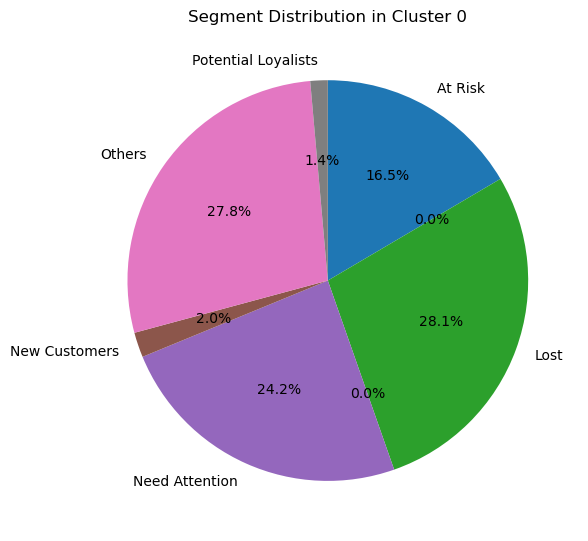

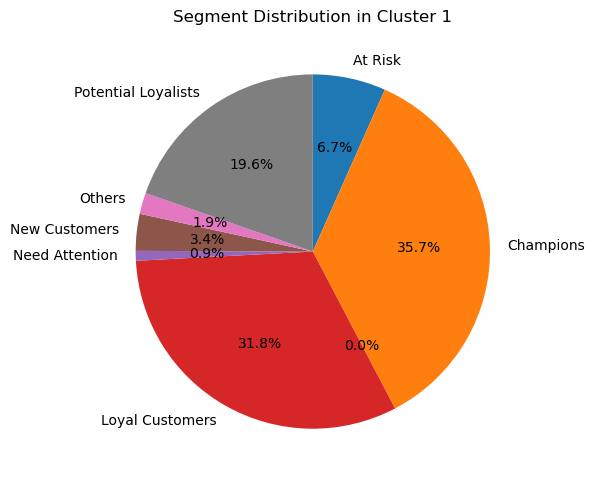

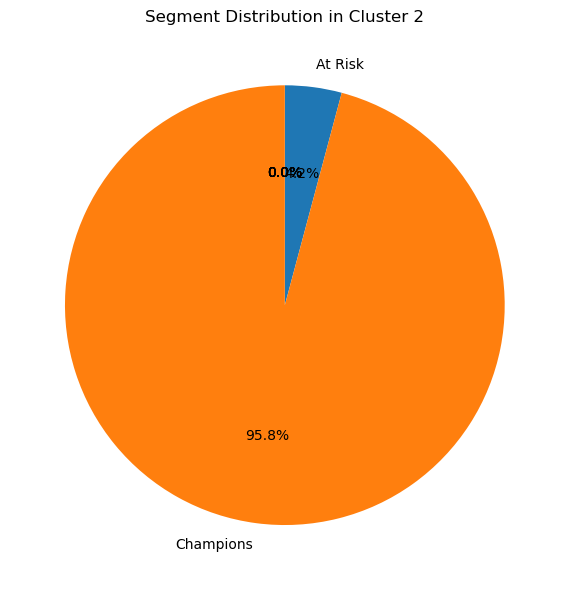

In [52]:

for cluster in cluster_segment_crosstab.index:
    plt.figure(figsize=(6, 6))
    cluster_segment_crosstab.loc[cluster].plot.pie(
        autopct='%1.1f%%',
        startangle=90,
        counterclock=False,
        title=f'Segment Distribution in Cluster {cluster}'
    )
    plt.ylabel('')  # Hide y-axis label
    plt.tight_layout()
    plt.show()

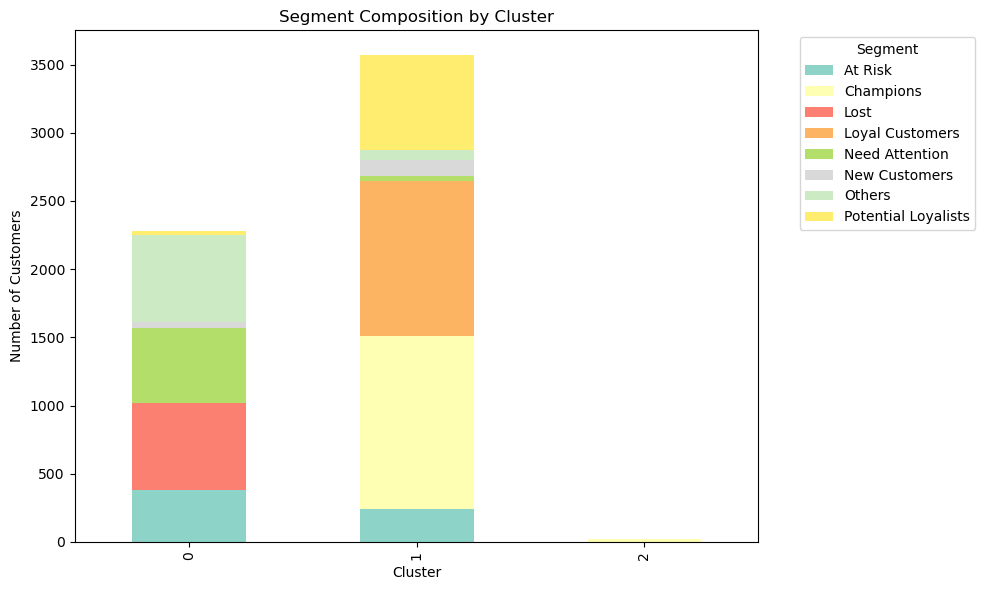

In [53]:
cluster_segment_crosstab.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    colormap='Set3'
)

plt.title('Segment Composition by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.legend(title='Segment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Cluster Interpretation from Segment Distribution

Using the **percentage crosstab** as seen in pie charts above to understand the dominant segment in each cluster.

- **Cluster 0** is a mix dominated by **Lost (28.1%)**, **Others (27.8%)**, **Need Attention (24.2%)** and **At Risk (16.5%)**
- **Cluster 1** is a mix, but strongly **Champions (35.7%)** and **Loyal Customers (31.8%)**
- **Cluster 2** is almost entirely **Champions (95.8%)** — a VIP cluster!

I'll use these results to **label each cluster** based on the dominant behavior.


#### Labelling Clusters Based On Dominant Behaviour

In [54]:
# Get dominant segment per cluster
dominant_segment = cluster_segment_pct.idxmax(axis=1)

# Define custom human-friendly labels for interpretation
cluster_names = {
    0: 'Hibernating / At Risk',
    1: 'Engaged & Growing',
    2: 'VIP / Top Champions'
}

# Add these to RFM DataFrame
rfm['Cluster_Label'] = rfm['Cluster'].map(cluster_names)

rfm.head(10)

,CustomerID,Frequency,Monetary,Recency,R_Score,F_Score,M_Score,RFM_Score,Segment,AOV,Cluster,Cluster_Label
0,12346.0,12,77556.46,326,2,5,5,255,At Risk,6463.038333,1,Engaged & Growing
1,12347.0,8,4921.53,2,5,4,5,545,Champions,615.191250,1,Engaged & Growing
2,12348.0,5,2019.40,75,3,4,4,344,Loyal Customers,403.880000,1,Engaged & Growing
3,12349.0,4,4428.69,19,5,3,5,535,Loyal Customers,1107.172500,1,Engaged & Growing
4,12350.0,1,334.40,310,2,1,2,212,Others,334.400000,0,Hibernating / At Risk
5,12351.0,1,300.93,375,2,1,2,212,Others,300.930000,0,Hibernating / At Risk
6,12352.0,10,2849.84,36,4,5,4,454,Champions,284.984000,1,Engaged & Growing
7,12353.0,2,406.76,204,2,2,2,222,Need Attention,203.380000,0,Hibernating / At Risk
8,12354.0,1,1079.40,232,2,1,3,213,Others,1079.400000,1,Engaged & Growing
9,12355.0,2,947.61,214,2,2,3,223,Need Attention,473.805000,1,Engaged & Growing


---

## 📌 Conclusions

- **High-Value Customers**: The 'Champions' and 'Loyal Customers' segments, predominantly found in Cluster 1 ("Engaged & Growing") and Cluster 2 ("VIP / Top Champions"), contribute significantly to the company's revenue. These customers exhibit high frequency and monetary values, indicating strong engagement and loyalty.

- **At-Risk Segments**: Cluster 0 ("Hibernating / At Risk") encompasses customers with low recency and frequency scores. This includes segments like 'At Risk', 'Need Attention', and 'Lost', highlighting a need for re-engagement strategies.

- **Growth Opportunities**: Segments such as 'New Customers' and 'Potential Loyalists', dispersed across Clusters 0 and 1, represent customers with recent activity but lower frequency or monetary values. These groups offer potential for growth through targeted marketing efforts.

- **Clustering Insights**: The integration of K-Means clustering with RFM segmentation has provided a nuanced understanding of customer behaviors, allowing for more tailored marketing strategies.

---

## 📈 Recommendations

- **Champions & VIPs (Clusters 1 & 2)**:
  - Implement exclusive loyalty programs and personalized offers to maintain engagement.
  - Solicit feedback to further enhance customer satisfaction.

- **At Risk & Lost Customers (Cluster 0)**:
  - Deploy re-engagement campaigns, such as special discounts or personalized communications, to win back these customers.
  - Analyze churn reasons to address underlying issues.

- **New Customers & Potential Loyalists**:
  - Provide onboarding experiences that highlight product value.
  - Offer incentives for repeat purchases to encourage loyalty.

- **Need Attention Segment**:
  - Monitor purchasing patterns to identify barriers to frequent purchases.
  - Customize marketing messages to address specific needs or concerns.

---

## 📁 Next Steps

- **Enhance Data Integration**:
  - Incorporate demographic and behavioral data to enrich customer profiles.
  - Utilize data from multiple channels to gain a holistic view of customer interactions.

- **Explore Advanced Clustering Techniques**:
  - Experiment with algorithms like DBSCAN or Hierarchical Clustering to validate and potentially improve segmentation results.
  - Assess clustering performance using metrics such as Silhouette Score or Davies-Bouldin Index.

- **Develop a Real-Time Dashboard**:
  - Create an interactive dashboard to monitor customer segments and key metrics in real-time.
  - Enable dynamic updates to track the effectiveness of marketing strategies over time.

- **Implement A/B Testing**:
  - Test different marketing approaches across segments to determine the most effective strategies.
  - Use insights to refine campaigns and improve customer engagement.

- **Regularly Update Segmentation Models**:
  - Schedule periodic reviews of segmentation models to account for changing customer behaviors and market trends.
  - Ensure that marketing strategies remain aligned with current customer needs.

---

By integrating RFM analysis with K-Means clustering, this project has successfully identified distinct customer segments, providing actionable insights for targeted marketing and customer relationship management.

---
